<a href="https://colab.research.google.com/github/Tudped/RFM_analysis/blob/main/RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [52]:
import numpy as np
import pandas as pd
import missingno as msno # missing value
import matplotlib.pyplot as plt
import seaborn as sns

#Import KMean libries
from sklearn.cluster import KMeans
# import scaler
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [53]:
# set default values
# set figure size to fit current screen
plt.rcParams['figure.figsize'] = (10, 5)

In [54]:
# User define function

# function to find outlier
def plotTopRec(dataframe, x, y, NumRec=None, Title=None,
               sort=None, figsize=None, rotation=None, fontsize=8,
              xlabel=None, ylabel=None):
    if Title == None:
        Title = "Top " + y +" by " + x
    if xlabel == None:
        xlabel = x
    if ylabel == None:
        ylabel = y
    if sort == "ascending":
        dataframe=dataframe.sort_values(by=y, ascending=True)
    elif sort == "decending":
        dataframe=dataframe.sort_values(by=y, ascending=False)
    else:
        dataframe=dataframe

    plt.figure(figsize=figsize)
    plt.xticks(rotation=rotation, fontsize=fontsize)
    topchart = sns.barplot(data=dataframe.head(NumRec), x=x, y=y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(Title)
    plt.show()
    display(dataframe.head(NumRec).T.style.hide(axis="columns"))

# Exploratory Data Analysis

## Import data [Online Retail Dataset](https://www.kaggle.com/datasets/vijayuv/onlineretail)


In [65]:
df = pd.read_csv("online_retail.csv", encoding='unicode_escape')

Let's see what we are working with...

In [66]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Count Dataset variable type.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Understanding Data
Since there is no accompanying data dictionary, let's explor data to understand what we have.

In [69]:
# Is there negative quantiy?
print("Num of negative quantity: ", (df['Quantity']<0).sum())
display(df[df['Quantity']<0].head(10))

Num of negative quantity:  10624


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/2010 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/2010 10:24,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,12/1/2010 12:38,4.25,17897.0,United Kingdom


Look like Invoice with C might stand for "Canceled" or Return

In [70]:
# Let count number of Invoice contain 'C'
print("Num ber record contain C: ", (df['InvoiceNo'].str.contains('C')).sum())
print("Num of negative quantity: ", (df['Quantity']<0).sum())

Num ber record contain C:  9288
Num of negative quantity:  10624


There's more negative quantity the "Cancelled" record. Let see if we can understand what those are.

In [71]:
df[(~df['InvoiceNo'].str.contains('C', na=False)) & (df['Quantity']<0) & (~df['Description'].isnull())].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7313,537032,21275,?,-30,12/3/2010 16:50,0.0,NaN,United Kingdom
13217,537425,84968F,check,-20,12/6/2010 15:35,0.0,NaN,United Kingdom
13218,537426,84968E,check,-35,12/6/2010 15:36,0.0,NaN,United Kingdom
13264,537432,35833G,damages,-43,12/6/2010 16:10,0.0,NaN,United Kingdom
21338,538072,22423,faulty,-13,12/9/2010 14:10,0.0,NaN,United Kingdom
21518,538090,20956,?,-723,12/9/2010 14:48,0.0,NaN,United Kingdom
22296,538161,46000S,Dotcom sales,-100,12/9/2010 17:25,0.0,NaN,United Kingdom
22297,538162,46000M,Dotcom sales,-100,12/9/2010 17:25,0.0,NaN,United Kingdom
42564,540010,22501,reverse 21/5/10 adjustment,-100,1/4/2011 11:13,0.0,NaN,United Kingdom
42566,540012,22502,reverse 21/5/10 adjustment,-100,1/4/2011 11:14,0.0,NaN,United Kingdom


Seem like these records are inventory adjustments.
These records can be removed for analysis

In [72]:
print("Number of records with negative UnitPrice: ", (df['UnitPrice']<0).sum())

Number of records with negative UnitPrice:  2


### Data Cleaning
##### Finding duplicated records and missing values

In [73]:
print("Number of duplicated: ", df.duplicated().sum())
print("Dataframe shape: ", df.shape)

Number of duplicated:  5268
Dataframe shape:  (541909, 8)


In [74]:
# Number of missing values by features
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: >

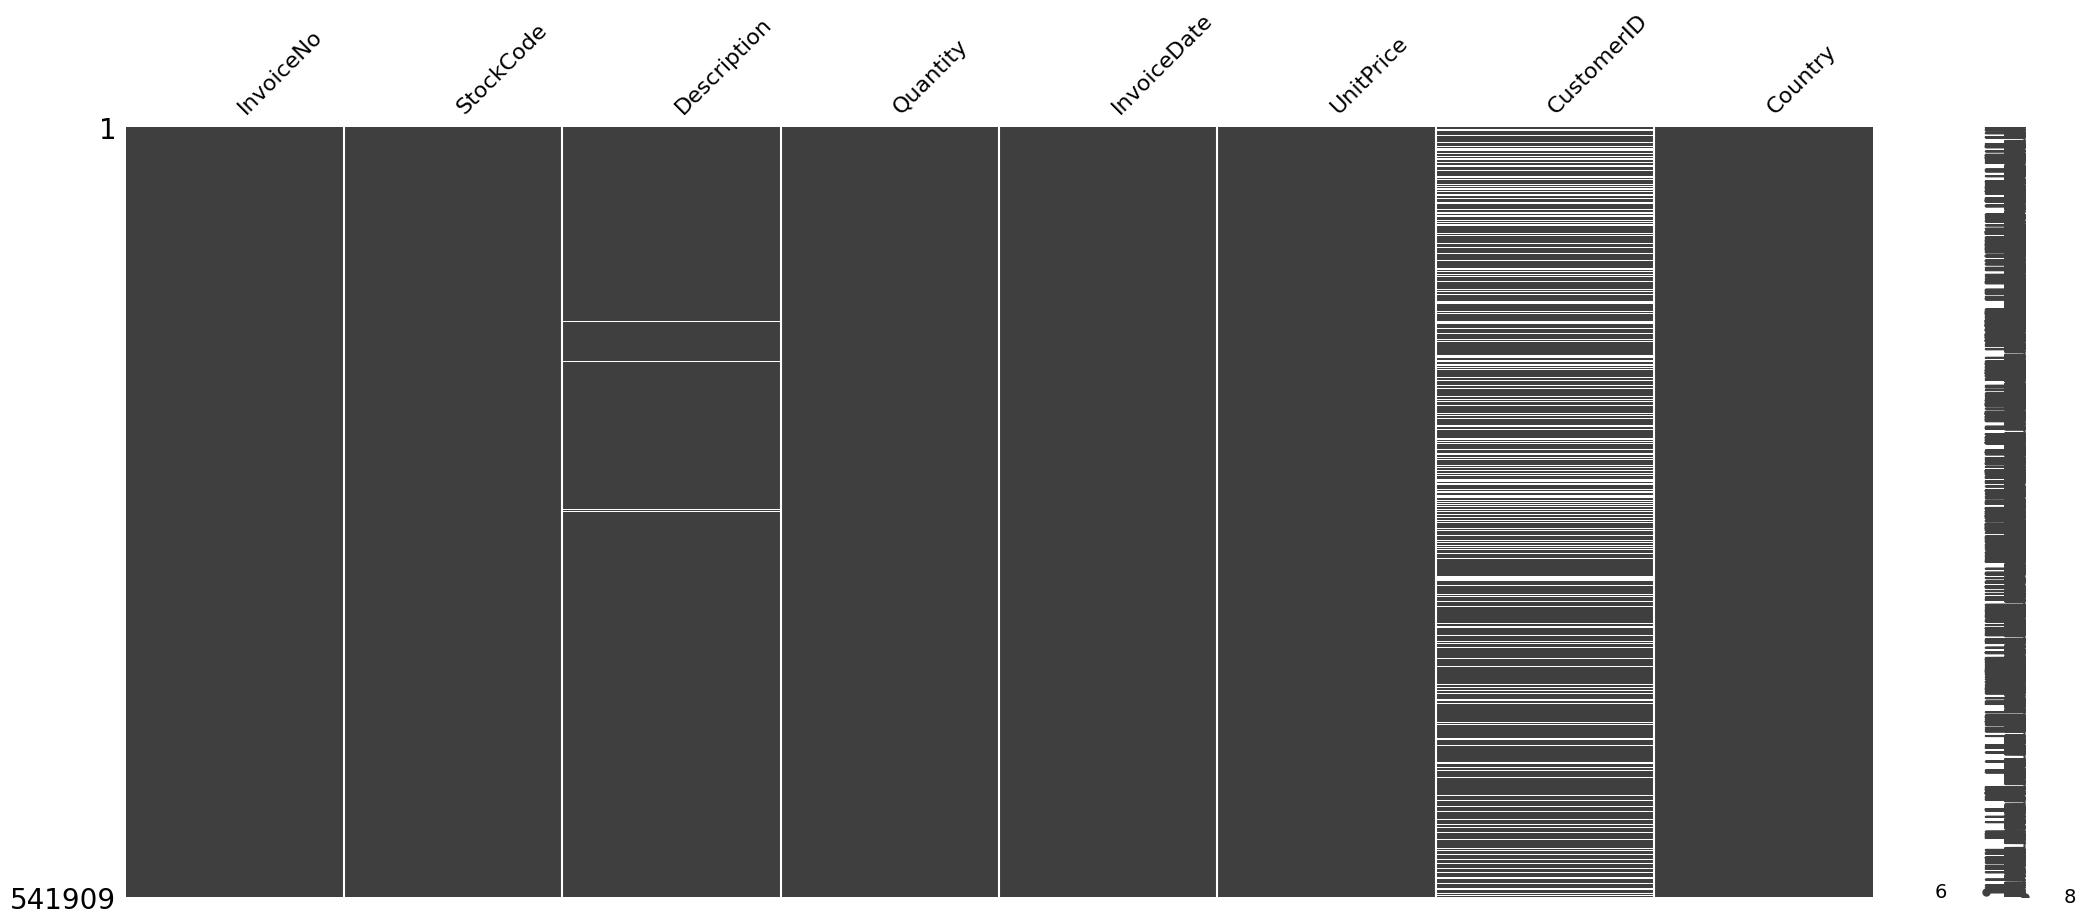

In [75]:
msno.matrix(df)

<Axes: >

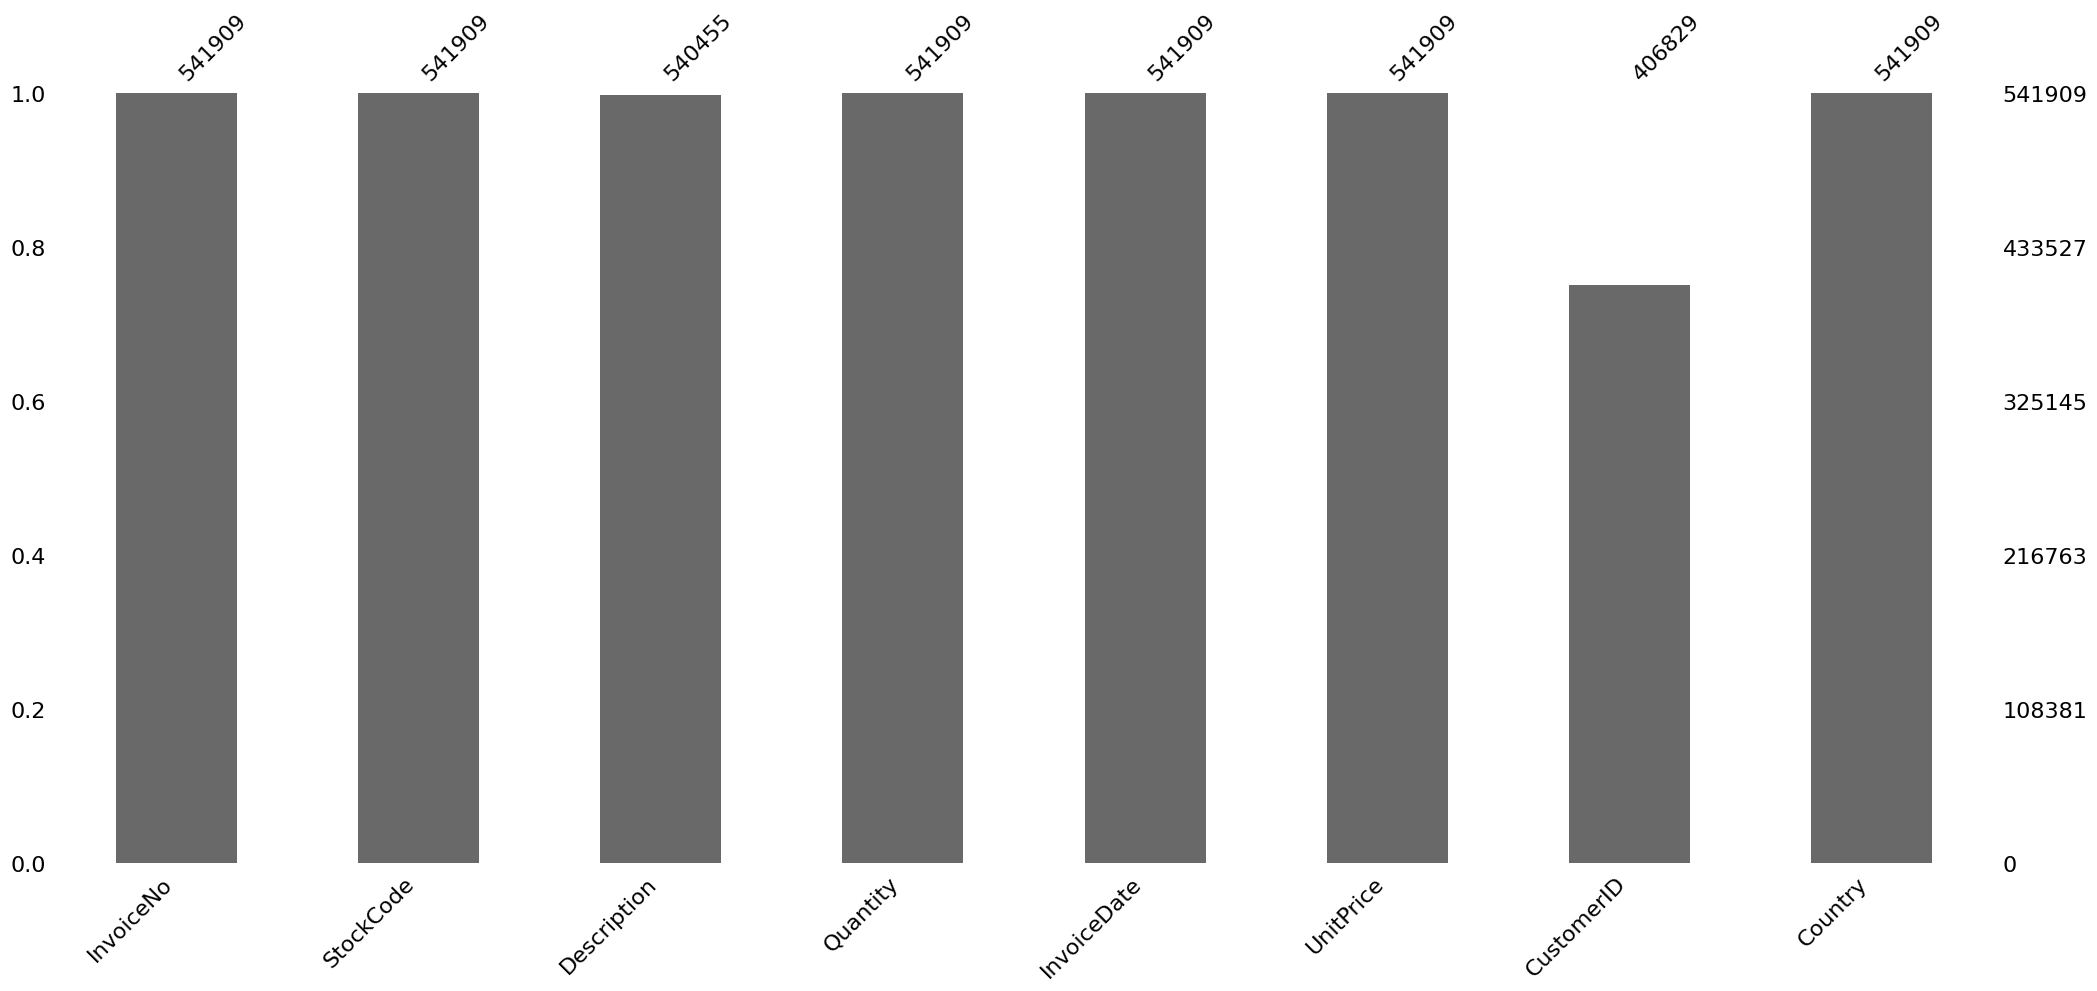

In [76]:
msno.bar(df)

#### What we know so for ...
* Data has 8 features: 5 char, 1 int, and 2 float.
* 5268 Duplicates records
* 136,335 missing value: 1454 are Descrition, 135080 are CustomerID
* Data with negative unit price or quanity should be remove

## Data wrangling

#### Treating Missing Values

In [77]:
print("Shape of orginal data: ", df.shape)
print("Shape of data after drop NaN: ", df.dropna().shape)

Shape of orginal data:  (541909, 8)
Shape of data after drop NaN:  (406829, 8)


In [78]:
# Drop missing values
df = df.dropna()

In [79]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### Finding and dealing with duplicates

In [80]:
print("Number of dupliated records: ", df.duplicated().sum())

Number of dupliated records:  5225


In [81]:
# Delete duplicate record
df = df.drop_duplicates(keep="first")

In [82]:
print("Number of dupliated after treating: ", df.duplicated().sum())

Number of dupliated after treating:  0


#### Finding return items

In [83]:
print("Number for records with negative unit price: ", (df["UnitPrice"]<0).sum())

Number for records with negative unit price:  0


In [84]:
print("Number for records with negative quantity: ", (df["Quantity"]<0).sum())

Number for records with negative quantity:  8872


Droping returns records

In [85]:
# df.drop((df[df["Quantity"]<0]), axis=0)
df = df[df["Quantity"]>=0]

In [86]:
print("Number for records with negative quantity: ", (df["Quantity"]<0).sum())

Number for records with negative quantity:  0


In [87]:
df.shape

(392732, 8)

## Exploratory Data Analysis

In [88]:
# Let's look at data again
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [89]:
# number of Uniques:
df.nunique()

InvoiceNo      18536
StockCode       3665
Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      4339
Country           37
dtype: int64

### Descriptive Analysis

In [90]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [91]:
df.describe(include=object)

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,392732,392732,392732,392732,392732
unique,18536,3665,3877,17286,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,11/14/2011 15:27,United Kingdom
freq,542,2023,2016,542,349227


## Data Engineer

In [92]:
# Adding Revenue column
df['Revenue'] = df['UnitPrice']*df['Quantity']

In [93]:
# change Invoice Date to dateTime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
 8   Revenue      392732 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB


In [95]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


### What questions we can ask?
* Which country has the highest revenue?
* What items sells the most?
* Number of customer by country?

In [96]:
#top_countries = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
top_countries = df.groupby('Country', as_index=False).agg({'Revenue':lambda x:x.sum()}).sort_values('Revenue', ascending=False)

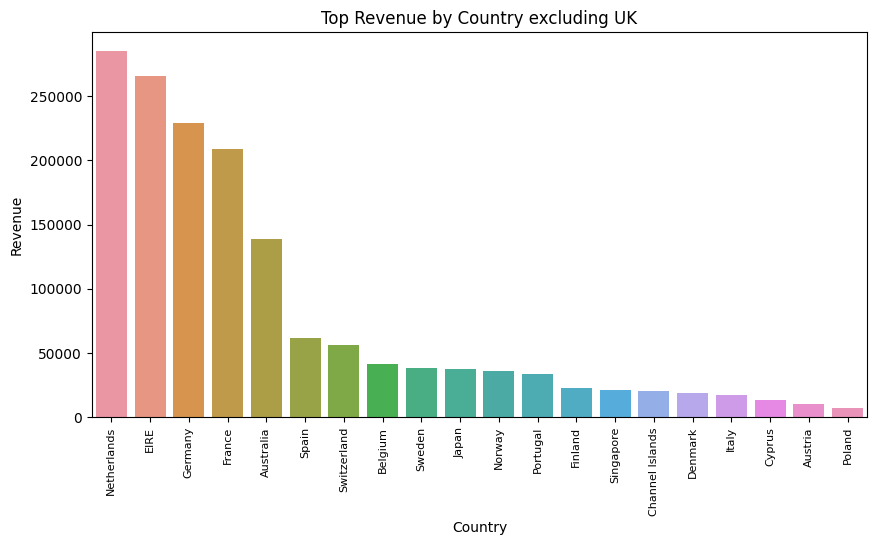

Country,Netherlands,EIRE,Germany,France,Australia,Spain,Switzerland,Belgium,Sweden,Japan,Norway,Portugal,Finland,Singapore,Channel Islands,Denmark,Italy,Cyprus,Austria,Poland
Revenue,285446.340000,265262.460000,228678.400000,208934.310000,138453.810000,61558.560000,56443.950000,41196.340000,38367.830000,37416.370000,36165.440000,33375.840000,22546.080000,21279.290000,20440.540000,18955.340000,17483.240000,13502.850000,10198.680000,7334.650000


In [97]:
plotTopRec(dataframe=top_countries.tail(-1), x="Country", y="Revenue", figsize=(10,5), NumRec=20, sort="decending",
           rotation=90, Title="Top Revenue by Country excluding UK")

#### Number of customer by country

In [98]:
#cusbycountry = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
#print(cusbycountry.head(5))
cusbycountry = df.groupby('Country', as_index=False).agg({'CustomerID': lambda x:x.nunique()}).sort_values('CustomerID', ascending=False)

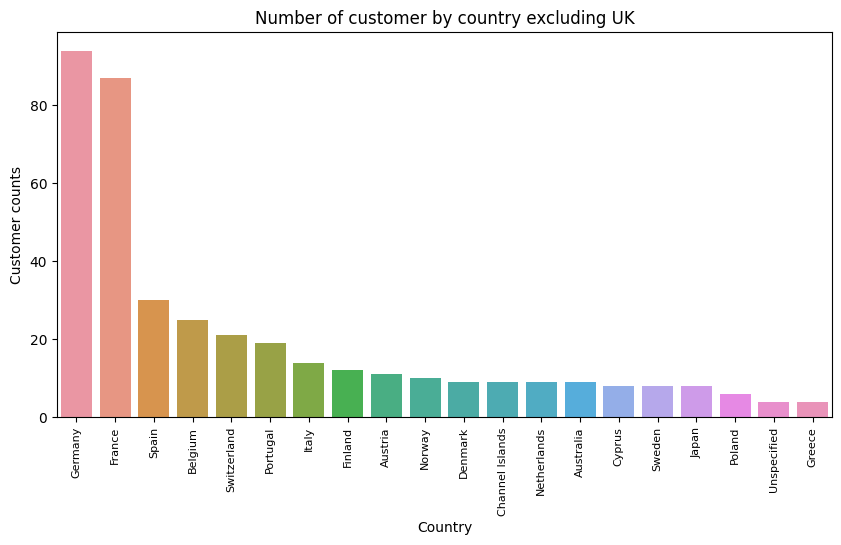

Country,Germany,France,Spain,Belgium,Switzerland,Portugal,Italy,Finland,Austria,Norway,Denmark,Channel Islands,Netherlands,Australia,Cyprus,Sweden,Japan,Poland,Unspecified,Greece
CustomerID,94,87,30,25,21,19,14,12,11,10,9,9,9,9,8,8,8,6,4,4


In [99]:
# Excluding UK for better visualization
plotTopRec(dataframe=cusbycountry.tail(-1),x="Country", y="CustomerID", NumRec=20, sort="decending",
           figsize=(10,5), rotation=90, Title="Number of customer by country excluding UK", ylabel="Customer counts")

#### What items sell the most?

In [100]:
# df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
most_sell_item = df.groupby('Description', as_index=False).agg({'Quantity': lambda x:x.sum()}).sort_values('Quantity',ascending=False)

In [101]:
most_sell_item.head(5)

,Description,Quantity
2319,"PAPER CRAFT , LITTLE BIRDIE",80995
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916
3786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
1762,JUMBO BAG RED RETROSPOT,46078
3698,WHITE HANGING HEART T-LIGHT HOLDER,36706


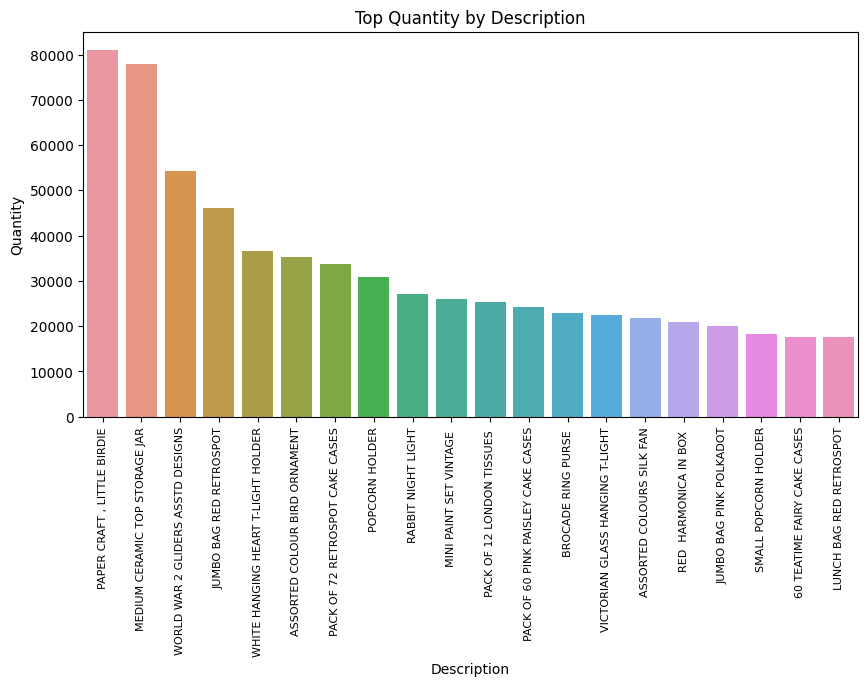

Description,"PAPER CRAFT , LITTLE BIRDIE",MEDIUM CERAMIC TOP STORAGE JAR,WORLD WAR 2 GLIDERS ASSTD DESIGNS,JUMBO BAG RED RETROSPOT,WHITE HANGING HEART T-LIGHT HOLDER,ASSORTED COLOUR BIRD ORNAMENT,PACK OF 72 RETROSPOT CAKE CASES,POPCORN HOLDER,RABBIT NIGHT LIGHT,MINI PAINT SET VINTAGE,PACK OF 12 LONDON TISSUES,PACK OF 60 PINK PAISLEY CAKE CASES,BROCADE RING PURSE,VICTORIAN GLASS HANGING T-LIGHT,ASSORTED COLOURS SILK FAN,RED HARMONICA IN BOX,JUMBO BAG PINK POLKADOT,SMALL POPCORN HOLDER,60 TEATIME FAIRY CAKE CASES,LUNCH BAG RED RETROSPOT
Quantity,80995,77916,54319,46078,36706,35263,33670,30919,27153,26076,25329,24230,22927,22404,21876,20945,20148,18241,17664,17576


In [102]:
plotTopRec(dataframe=most_sell_item, x="Description", y='Quantity', NumRec=20, sort="decending", figsize=(10,5), rotation=90)

In [103]:
print(df['InvoiceDate'].tail(5))
print(df['InvoiceDate'].dt.hour.tail(5))

541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, dtype: datetime64[ns]
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, dtype: int64


### Most Transaction and Revenue by time of day.

In [104]:
# By Tranaction
df['hour'] = df['InvoiceDate'].dt.hour
timeofsell = df.groupby('hour', as_index=False).agg({'InvoiceNo': lambda x:x.nunique()})

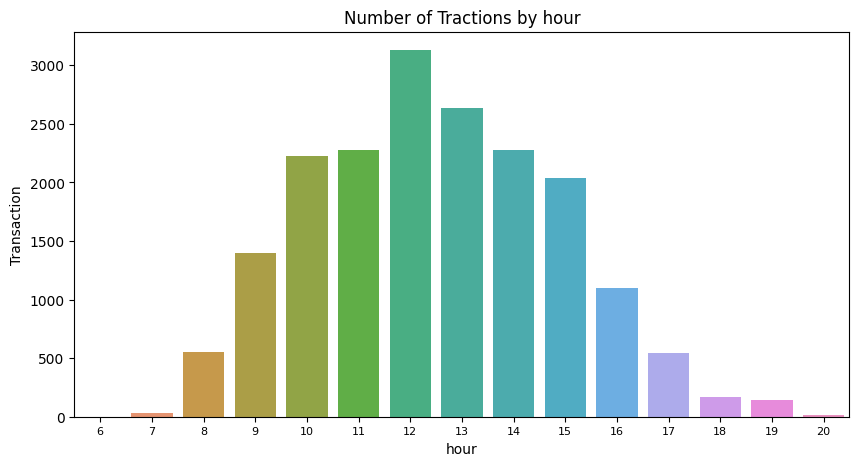

hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
InvoiceNo,1,29,555,1394,2226,2277,3130,2637,2275,2038,1100,544,169,144,18


In [105]:
plotTopRec(timeofsell,x="hour", y="InvoiceNo", figsize=(10,5), ylabel="Transaction", Title="Number of Tractions by hour")

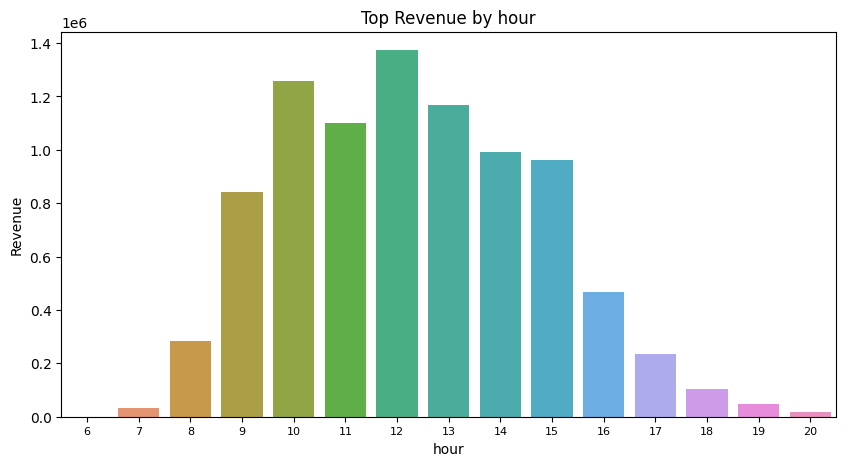

hour,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000
Revenue,4.250000,31059.210000,281997.790000,842392.341000,1259267.591000,1101177.600000,1373695.390000,1168724.200000,991992.821000,963559.680000,467380.560000,233811.591000,104744.990000,48568.400000,18832.480000


In [106]:
# Time of Sell by Revenue
timeofsell = df.groupby('hour', as_index=False).agg({'Revenue': lambda x:x.sum()})
plotTopRec(dataframe=timeofsell, x="hour", y= "Revenue", figsize=(10,5))

### Revenue by Month

In [107]:
df['monthyear'] = df['InvoiceDate'].dt.to_period(freq='M')
monthly_sell = df.groupby('monthyear', as_index=False).agg({'Revenue': lambda x:x.sum()})

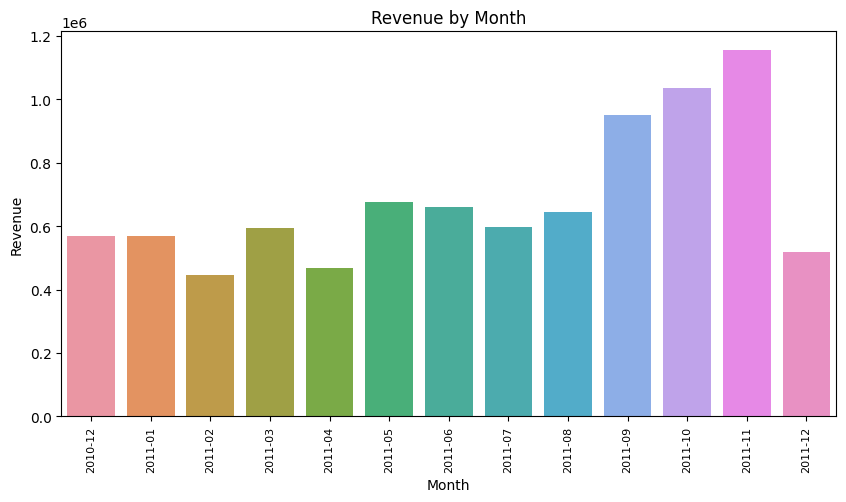

monthyear,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
Revenue,570422.730000,568101.310000,446084.920000,594081.760000,468374.331000,677355.150000,660046.050000,598962.901000,644051.040000,950690.202000,1035642.450000,1156205.610000,517190.440000


In [108]:
plotTopRec(dataframe=monthly_sell,x="monthyear", y="Revenue", figsize=(10,5), rotation=90, Title="Revenue by Month", xlabel="Month")

## RMF Analysis

### Feature engineer: Creating RMF variables.

#### Recency: Days since last purchased = Date reference - last purchased date
#### Frequency: Number of purchases by customer = count # of unique invoice/transaction
#### Monetary: Amount customer spend = sum of revenue by customer

In [109]:
# Set reference date to 1 day after lastest date
refDate = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print("Reference Date: ", refDate)

Reference Date:  2011-12-10 12:50:00


In [110]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'hour', 'monthyear'],
      dtype='object')

In [111]:
rfm = df.groupby("CustomerID", as_index=True).agg({
    'InvoiceDate': lambda x: (refDate-x.max()).days,
    'InvoiceNo': lambda x: x.nunique(),
    'Revenue': lambda x: x.sum()
})
rfm.columns = ["recency", "frequency", "monetery"]
display(rfm.head(10))

,recency,frequency,monetery
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
12352.0,36,8,2506.04
12353.0,204,1,89.00
12354.0,232,1,1079.40
12355.0,214,1,459.40


In [112]:
rfm.describe()

,recency,frequency,monetery
count,4339.000000,4339.000000,4339.000000
mean,92.518322,4.271952,2048.215924
std,100.009747,7.705493,8984.248352
min,1.000000,1.000000,0.000000
25%,18.000000,1.000000,306.455000
50%,51.000000,2.000000,668.560000
75%,142.000000,5.000000,1660.315000
max,374.000000,210.000000,280206.020000


In [113]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recency    4339 non-null   int64  
 1   frequency  4339 non-null   int64  
 2   monetery   4339 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.6 KB


## KMean
### Choosing optimal cluster

In [114]:
from yellowbrick.cluster import KElbowVisualizer as ke
from yellowbrick.cluster import SilhouetteVisualizer as si

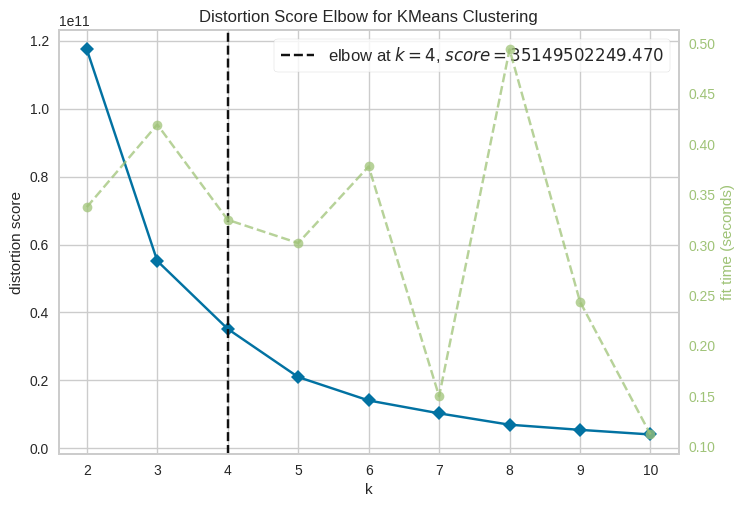

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [115]:
elbow_kmean = ke(KMeans(), k = 10)
elbow_kmean.fit(rfm)
elbow_kmean.show()

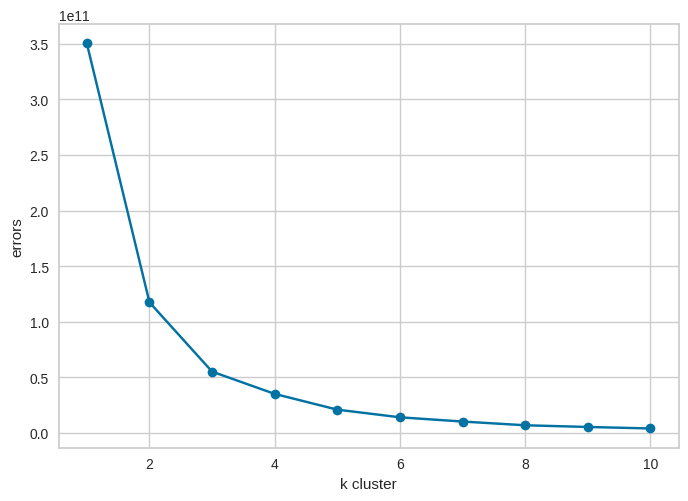

In [116]:
# Elbow visualiaztion
errors = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i).fit(rfm)
    errors.append((kmeans.inertia_))

plt.plot(range(1,11), errors, 'bo-')
plt.xlabel("k cluster")
plt.ylabel("errors")
plt.show()

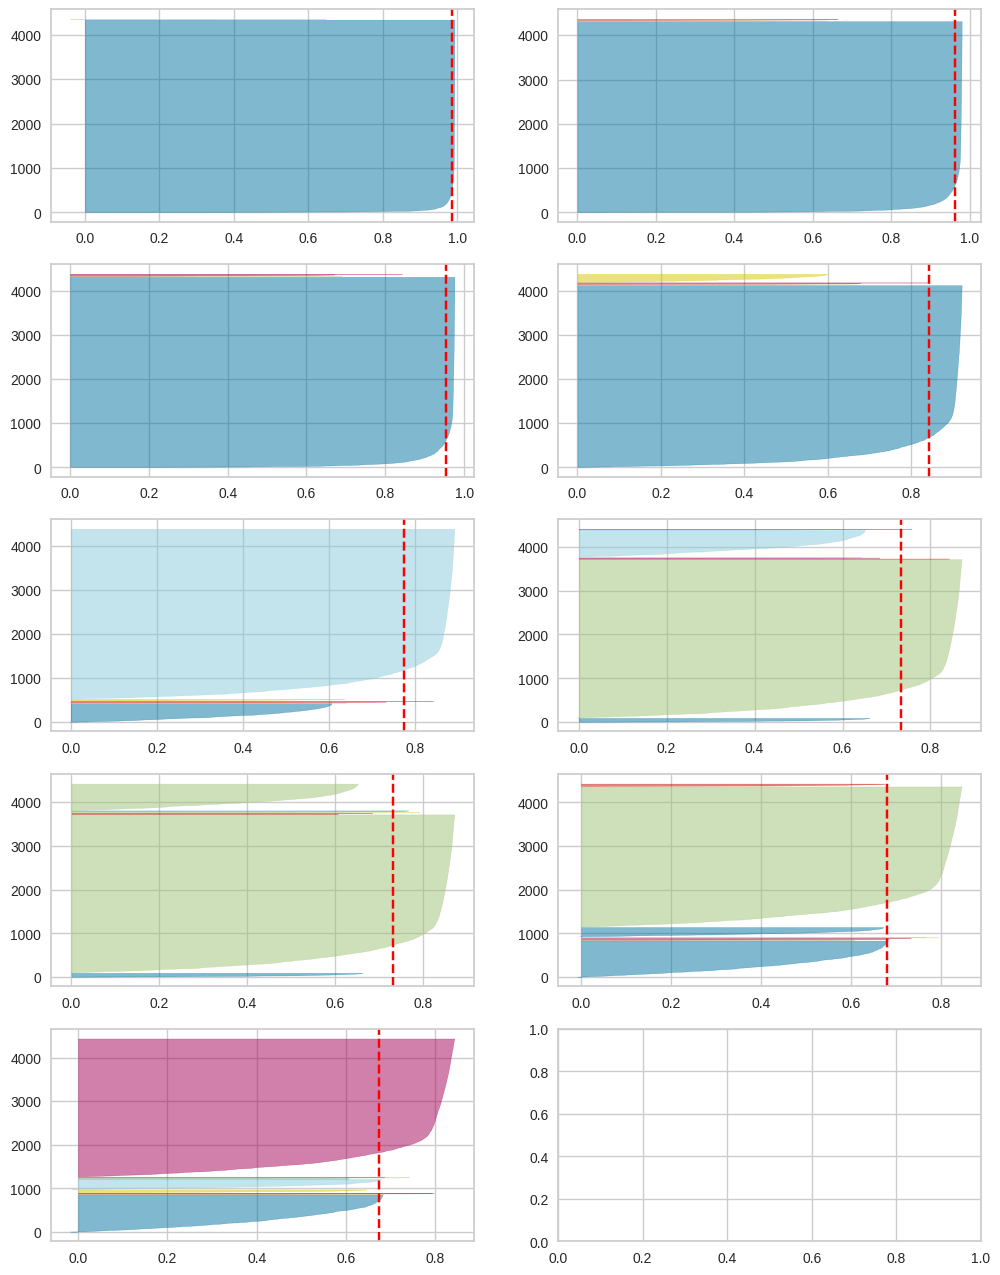

In [117]:
fig, ax = plt.subplots(5, 2, figsize=(12,16))
si_score=[]
for i in range(2,11):
    km = KMeans(n_clusters=i)
    q, mod = divmod(i, 2)
    vis = si(km, colors='yellowbrick', ax=ax[q-1][mod])
    vis.fit(rfm)
    si_score.append(vis.silhouette_score_)

In [118]:
si_score

[0.9845175850209223,
 0.9612288281389105,
 0.9543824145235958,
 0.8427081279481516,
 0.7750664068251835,
 0.7323164942191387,
 0.7323683212612837,
 0.6794859917439654,
 0.6742541955496922]

### From both evaluation optimal cluster number is 3

In [119]:
kmean=KMeans(n_clusters=3).fit(rfm)
rfmc = rfm.copy(deep=True)
rfmc['cluster'] = kmean.labels_

In [120]:
rfmc.head(10)

,recency,frequency,monetery,cluster
CustomerID,,,,
12346.0,326,1,77183.60,2
12347.0,2,7,4310.00,0
12348.0,75,4,1797.24,0
12349.0,19,1,1757.55,0
12350.0,310,1,334.40,0
12352.0,36,8,2506.04,0
12353.0,204,1,89.00,0
12354.0,232,1,1079.40,0
12355.0,214,1,459.40,0


In [121]:
# group customer
one = rfmc[rfmc["cluster"]==0]
two = rfmc[rfmc["cluster"]==1]
three = rfmc[rfmc["cluster"]==2]
#four = rfmc[rfmc["cluster"]==3]
#five = rfmc[rfmc["cluster"]==4]

In [122]:
rfmc['cluster'].value_counts()

0    4308
2      26
1       5
Name: cluster, dtype: int64

([<matplotlib.patches.Wedge at 0x7cb9fa48f040>,
 [Text(-1.0997229302008955, 0.024687583728597497, '0'),
  Text(1.099626349887194, -0.028668635017499014, '2'),
  Text(1.0999927916793684, -0.003982242261573837, '1')])

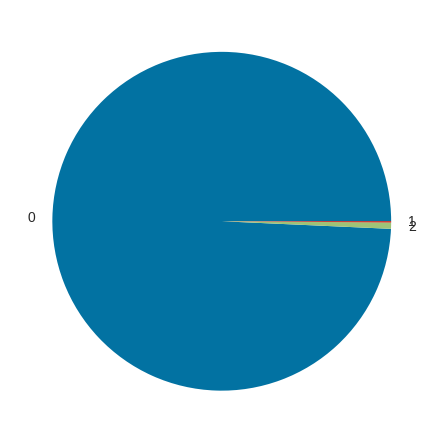

In [123]:
plt.pie(x=rfmc['cluster'].value_counts(), labels=rfmc['cluster'].value_counts().index)

In [124]:
rfmc.head(5)

,recency,frequency,monetery,cluster
CustomerID,,,,
12346.0,326,1,77183.60,2
12347.0,2,7,4310.00,0
12348.0,75,4,1797.24,0
12349.0,19,1,1757.55,0
12350.0,310,1,334.40,0


In [125]:
one.head()

,recency,frequency,monetery,cluster
CustomerID,,,,
12347.0,2,7,4310.00,0
12348.0,75,4,1797.24,0
12349.0,19,1,1757.55,0
12350.0,310,1,334.40,0
12352.0,36,8,2506.04,0


In [126]:
two.head()

,recency,frequency,monetery,cluster
CustomerID,,,,
14646.0,2,74,280206.02,1
14911.0,1,201,143711.17,1
16446.0,1,2,168472.50,1
17450.0,8,46,194390.79,1
18102.0,1,60,259657.30,1


In [127]:
three.head()

,recency,frequency,monetery,cluster
CustomerID,,,,
12346.0,326,1,77183.60,2
12415.0,24,21,124914.53,2
12748.0,1,210,33053.19,2
12931.0,22,15,42055.96,2
13089.0,3,97,58762.08,2


<function matplotlib.pyplot.show(close=None, block=None)>

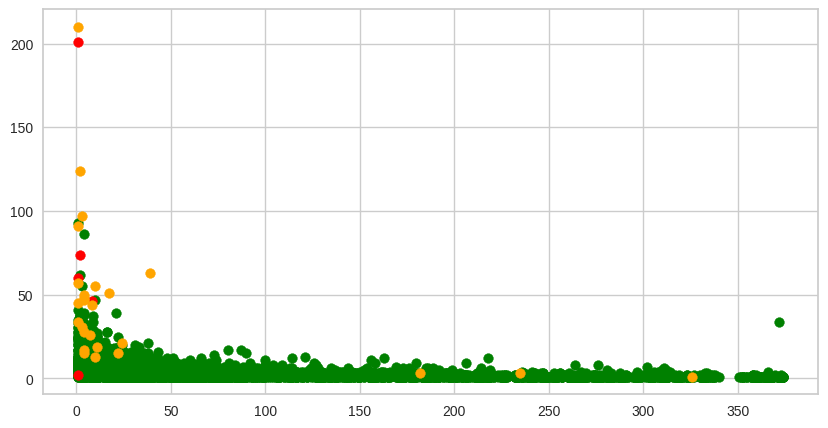

In [132]:
plt.figure(figsize=(10,5))
plt.scatter(one["recency"],one["frequency"],color='green')
plt.scatter(two["recency"],two["frequency"],color='red')
plt.scatter(three["recency"],three["frequency"],color='orange')
plt.show

<Figure size 2000x2000 with 0 Axes>

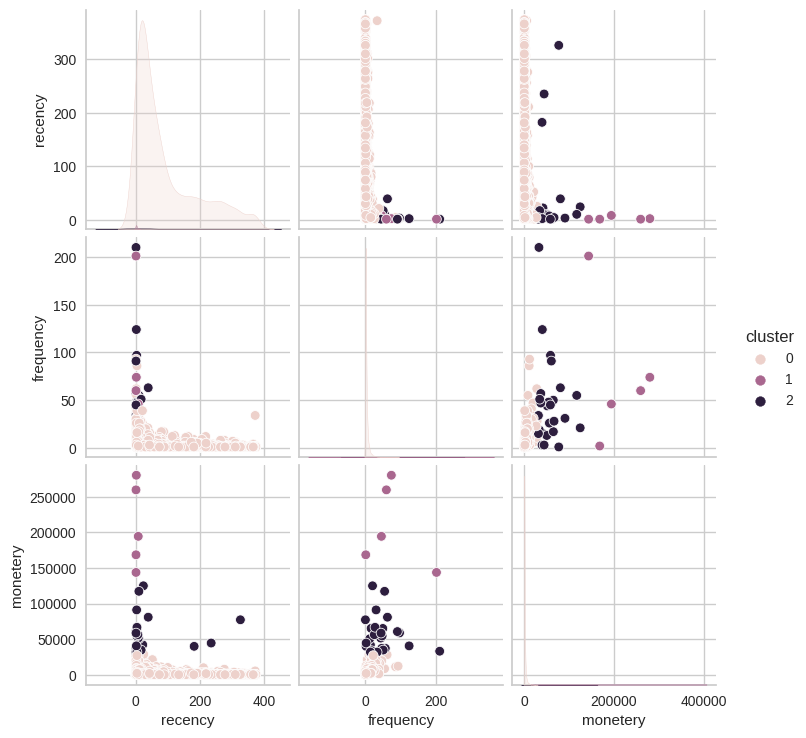

In [133]:
plt.figure(figsize=(20,20))
sns.pairplot(rfmc, hue='cluster')

### Normalized data

<Axes: >

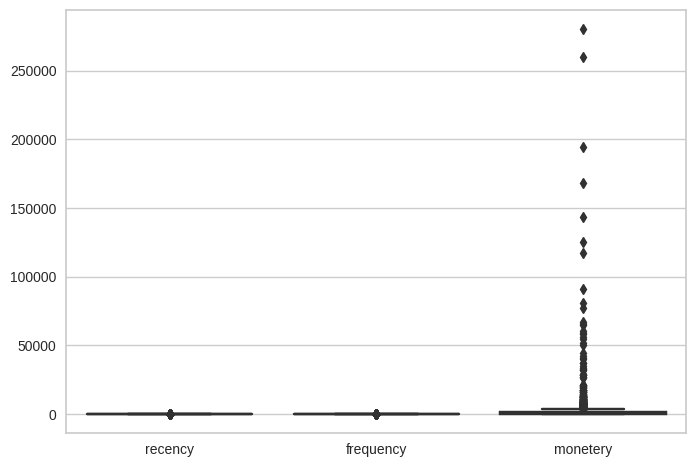

In [134]:
sns.boxplot(rfm)

In [135]:
scaler = StandardScaler()
rfm_norm = pd.DataFrame(scaler.fit_transform(rfm))

<Axes: >

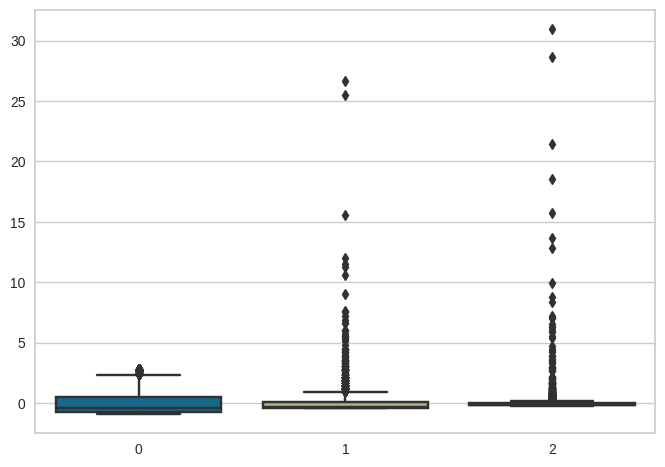

In [136]:
sns.boxplot(rfm_norm)

### Looks much better.

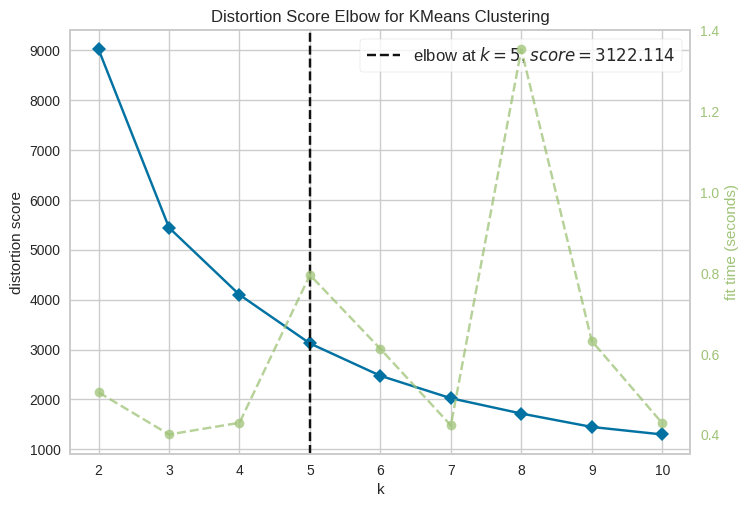

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [137]:
elbow_kmean = ke(KMeans(), k = 10)
elbow_kmean.fit(rfm_norm)
elbow_kmean.show()

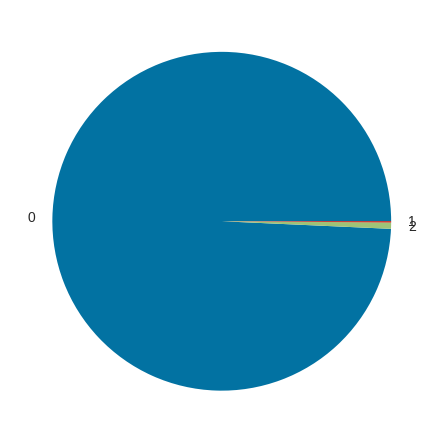

<Figure size 2000x2000 with 0 Axes>

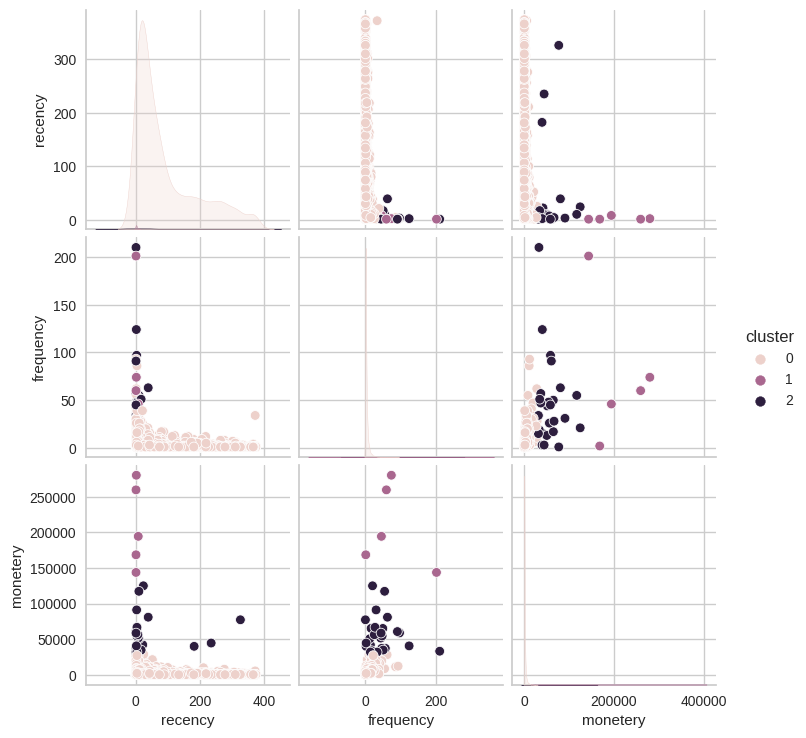

In [138]:
kmean=KMeans(n_clusters=3).fit(rfm_norm)
#rfmc = rfm.copy(deep=True)
rfm_norm['cluster'] = kmean.labels_
# group customer
one = rfm_norm[rfm_norm["cluster"]==0]
two = rfm_norm[rfm_norm["cluster"]==1]
three = rfm_norm[rfm_norm["cluster"]==2]
#four = rfm_norm[rfm_norm["cluster"]==3]
#five = rfm_norm[rfm_norm["cluster"]==4]
rfm_norm['cluster'].value_counts()
plt.pie(x=rfmc['cluster'].value_counts(), labels=rfmc['cluster'].value_counts().index)
plt.show()

plt.figure(figsize=(20,20))
sns.pairplot(rfmc, hue='cluster')
plt.show()

In [139]:
rfm_norm['customerId']=rfm.index
rfm_norm.columns = ["recency", "frequency", "monetary", "group","customerID"]

In [140]:
rfm_norm.head()

,recency,frequency,monetary,group,customerID
0,2.334858,-0.424675,8.363977,2,12346.0
1,-0.905199,0.354080,0.251779,1,12347.0
2,-0.175186,-0.035297,-0.027938,1,12348.0
3,-0.735196,-0.424675,-0.032357,1,12349.0
4,2.174855,-0.424675,-0.190780,2,12350.0


## Labeling customers

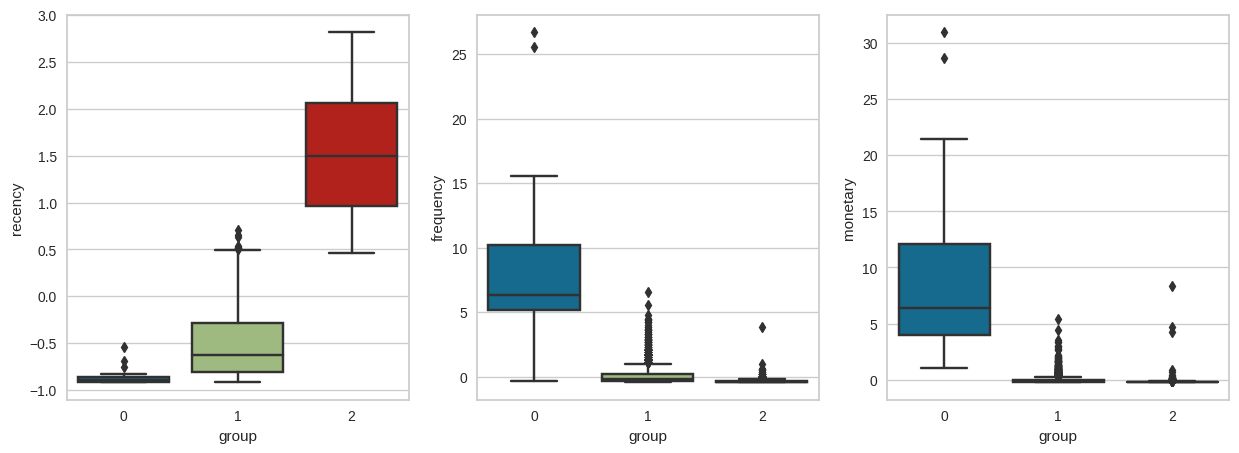

In [141]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(data=rfm_norm, x="group", y="recency")
plt.subplot(1,3,2)
sns.boxplot(data=rfm_norm, x="group", y="frequency")
plt.subplot(1,3,3)
sns.boxplot(data=rfm_norm, x="group", y="monetary")
plt.show()

**Group 1**: low recency, low frequency, low monetary: **Lost customers**  
**Group 2**: high recency, low frequency, low monetary: **New customers**  
**Group 3**: low recency, high frequency, high monetary: **Current customer**

In [142]:
rfm_norm['label'] = rfm_norm['group'].map({0:"Lost customer", 1:"New customer", 2:"Current customer"})

In [143]:
rfm_norm.head(10)

,recency,frequency,monetary,group,customerID,label
0,2.334858,-0.424675,8.363977,2,12346.0,Current customer
1,-0.905199,0.354080,0.251779,1,12347.0,New customer
2,-0.175186,-0.035297,-0.027938,1,12348.0,New customer
3,-0.735196,-0.424675,-0.032357,1,12349.0,New customer
4,2.174855,-0.424675,-0.190780,2,12350.0,Current customer
5,-0.565193,0.483873,0.050964,1,12352.0,New customer
6,1.114837,-0.424675,-0.218097,2,12353.0,Current customer
7,1.394842,-0.424675,-0.107847,2,12354.0,Current customer
8,1.214838,-0.424675,-0.176865,2,12355.0,Current customer
9,-0.695196,-0.165090,0.084960,1,12356.0,New customer


In [144]:
rfm_norm['label'].value_counts()

New customer        3231
Current customer    1082
Lost customer         26
Name: label, dtype: int64

In [145]:
rfm_norm['label'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

New customer        74.5%
Current customer    24.9%
Lost customer        0.6%
Name: label, dtype: object